# Práctica de Visualización

**Equipo:** 9

**Grupo:** 003. Lunes de 6:00 a 9:00 pm

**Integrantes:**
 
* 1808039 Gómez, Karen
* 1937881 Villarreal, Cecilia
* 1741418 Galván, Emmanuel

In [1]:
import pandas as pd

# Base de datos.

Base de datos: [US Police Shootings](https://www.kaggle.com/ahsen1330/us-police-shootings)

**Leer y mostrar los datos sin manipular.**

In [2]:
df_PS = pd.read_csv("shootings.csv")

In [3]:
df_PS.shape

(4895, 15)

In [4]:
df_PS.dtypes 

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
dtype: object

**NOTA:** Algo que vamos a tener que cambiar es modificar el tipo de dato que son algunas columnas asignandóles valores numérico para su estudio.

In [5]:
df_PS.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [6]:
df_PS.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

**Eliminar columnas no deseadas.**

* name: se eliminó, debido a que el nombre de las personas no es relevante para el análisis.
* body_camera: se eliminó, porque no nos interesa saber si traían una cámara en el cuerpo.

In [7]:
df_PS = df_PS.drop(['name','body_camera'], axis=1)

**Manipulación de los datos tipo null.**

No hay datos tipo null.

In [8]:
df_PS.isnull().sum()

id                         0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
arms_category              0
dtype: int64

**NOTA:** Esto es algo bueno para nosotros, porque no tendremos que ver como manejar estos datos.

**Reenombrar Celdas.**

In [9]:
df_PS = df_PS.rename(columns={'date': 'Dia', 
                              'manner_of_death':'Causa_de_muerte',
                              'armed':'Arma',
                              'age': 'Edad',
                              'gender':'Genero',
                              'race':'Raza', 
                              'city':'Ciudad',
                              'state':'Estado',
                              'signs_of_mental_illness':'Signos_de_enfermedades_mentales',
                              'flee':'Escapo',
                              'threat_level':'Nivel_de_amenaza',
                              'arms_category': 'Categoria_de_armas' })

**NOTA:** Las cambiamos para identificarlos con facilidad en nuestro idioma nativo.

[Rename](https://qastack.mx/programming/11346283/renaming-columns-in-pandas)

**Visualización después de limpieza y exportación de los datos.**

In [10]:
df_PS.head()

,id,Dia,Causa_de_muerte,Arma,Edad,Genero,Raza,Ciudad,Estado,Signos_de_enfermedades_mentales,Nivel_de_amenaza,Escapo,Categoria_de_armas
0,3,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,Guns
1,4,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,Guns
2,5,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,Unarmed
3,8,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,Other unusual objects
4,9,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,Piercing objects


In [11]:
df_PS.shape

(4895, 13)

In [12]:
df_PS.to_csv('DF_USPS.csv', index = False, header = True)

**NOTA:** Aquí le cambiamos el nombre al archivo con una nomenclatura que nos facilite su búsqueda y reconocimiento.

**Estadística básica.**

In [13]:
df_PS['Raza'].value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: Raza, dtype: int64

**Observación:** Contabilizamos el número de personas arrestadas por su raza.

In [14]:
df_PS['Raza'].value_counts().sum()

4895

**Observación:** Sumamos la cantidad de individuos por raza para determinar el total de nuestra población.

In [15]:
df_PS['Genero'].value_counts()

M    4673
F     222
Name: Genero, dtype: int64

**Observación:** Contabilizamos el número de personas arrestadas por género.

In [16]:
df_PS['Edad'].describe()

count    4895.000000
mean       36.549750
std        12.694348
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: Edad, dtype: float64

**Observación:** Dado que nuestro único dato numérico que tenemos para esta base, empleamos la edad para obtener una descripción de la edad.

**Nota:** No usamos otras herramientas estadísticas,por el tipo de variables que tenemos (en su mayoría categóricas).

**Conteo y proporción de Raza.**

<AxesSubplot:title={'center':'Gráfica de barras por raza'}>

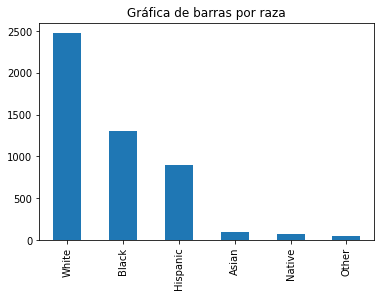

In [17]:
df_PS['Raza'].value_counts().plot.bar(title="Gráfica de barras por raza")

Gráfica de barras para el contador de personas separadas por su raza.

In [18]:
import matplotlib.pyplot as plt

In [19]:
import seaborn as sns

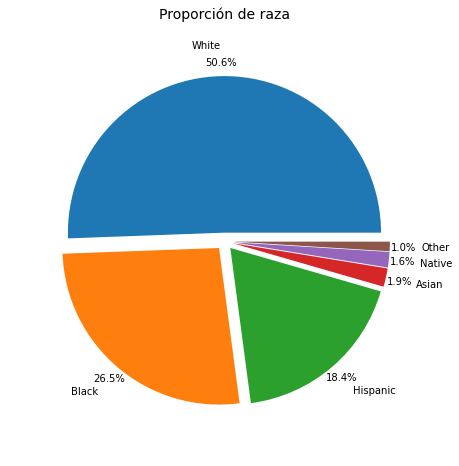

In [20]:
pie, ax = plt.subplots(figsize=[12,8])
labels = df_PS['Raza'].value_counts().keys()
plt.pie(x = df_PS['Raza'].value_counts(),
        autopct = '%.1f%%', explode=[0.05]*6,
        labels=labels,
        pctdistance=1.09,
        labeldistance = 1.2,
        radius = 0.9)
plt.title("Proporción de raza", fontsize=14)
plt.show()

Gráfica de pastel de la proporción de personas de cada raza.

**Estados con mayor incidencia.**

<AxesSubplot:title={'center':'Gráfico de barra por estados'}>

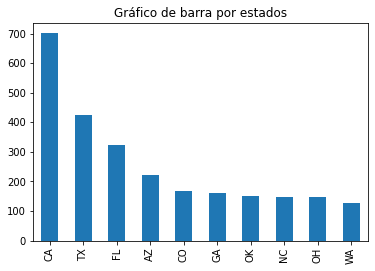

In [21]:
df_PS['Estado'].value_counts().sort_values(ascending = False).head(10).plot.bar(title="Gráfico de barra por estados")

Gráfica de conteo de incidentes de los 10 estados con mayor incidencia.

In [22]:
orden = df_PS['Estado'].value_counts().sort_values(ascending = False).keys()[0:10]

C:\Users\almac\anaconda3\envs\R y Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Estado', ylabel='count'>

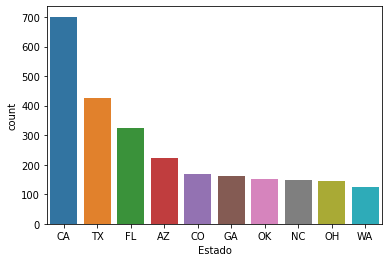

In [23]:
sns.countplot(df_PS['Estado'], order = orden)

Gráfica de conteo de incidentes de los 10 estados con mayor incidencia. Versión Seaborn de colores. Esta gráfica muestra cada barra por colores por lo que puede ser más fácil identificar cada estado. Mejor que la version de pandas.

**Análisis de las edades.**

<AxesSubplot:title={'center':'Gráfico de línea por edades'}>

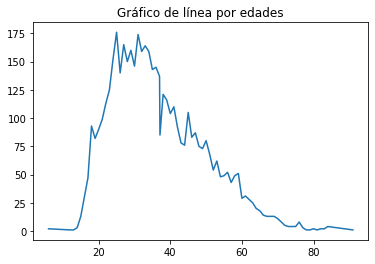

In [24]:
df_PS['Edad'].value_counts().sort_index().plot(title="Gráfico de línea por edades")

Gráfica de línea de conteo de edades para observar la distribución que tienen las edades.

<AxesSubplot:xlabel='Edad', ylabel='Density'>

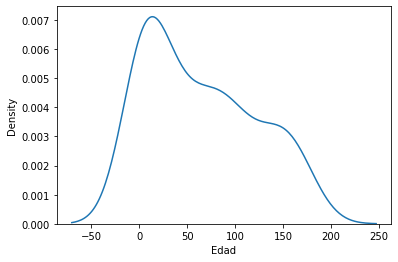

In [25]:
sns.kdeplot(df_PS['Edad'].value_counts().sort_index())

Gráfica de línea de conteo de edades para observar la distribución que tienen las edades con tecnica de KDE.

<AxesSubplot:>

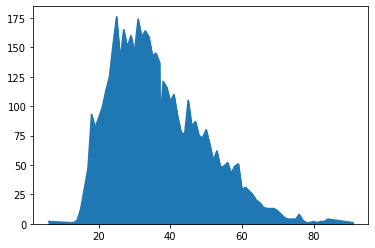

In [26]:
df_PS['Edad'].value_counts().sort_index().plot.area()

Gráfica de área de conteo de edades para observar la distribución que tienen las edades.

<AxesSubplot:ylabel='Frequency'>

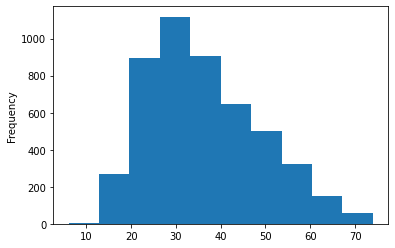

In [27]:
df_PS[df_PS['Edad'] < 75]['Edad'].plot.hist()

Histograma de frecuencias de edades menores a 75 años.

C:\Users\almac\anaconda3\envs\R y Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Edad'>

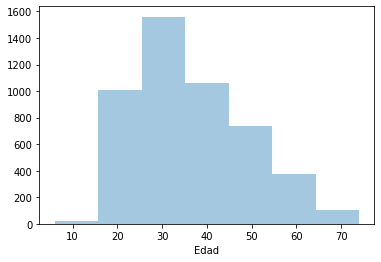

In [28]:
sns.distplot(df_PS[df_PS['Edad'] < 75]['Edad'], bins = 7, kde = False)

Histograma de frecuencias de edades menores a 75 años con 7 divisiones.

<AxesSubplot:xlabel='Estado', ylabel='Edad'>

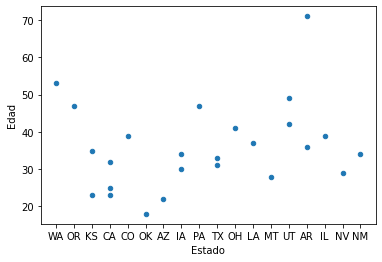

In [29]:
df_PS.head(25).plot.scatter(x='Estado', y='Edad')

Gráfica de dispersión de los estados y las edades.

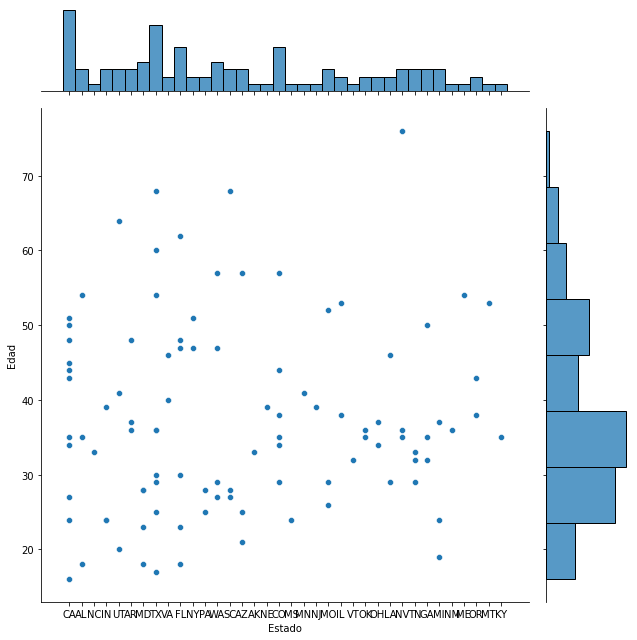

In [30]:
sns.jointplot(x='Estado', y='Edad', data = df_PS.sample(100), height = 9)

Gráfica de dispersión de los estados y las edades de una muestra de 100 elementos con histograma de cada uno.
Esta gráfica es similar a la de dispersión de pandas, sin embargo el poder observar el histograma puede ser favorable para identificar más información.

In [31]:
Conteo_incidentes = df_PS['Raza'].groupby([df_PS['Estado'], df_PS['Raza']]).count().unstack().fillna(0)

<AxesSubplot:xlabel='Estado'>

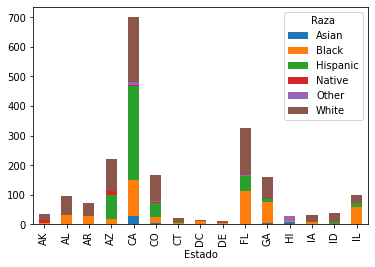

In [32]:
Conteo_incidentes.head(15).plot.bar(stacked = True)

Gráfica de incidentes apiladas por razas de 15 estados.

<AxesSubplot:xlabel='Estado'>

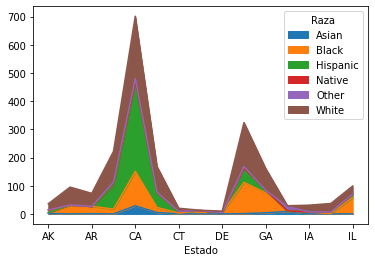

In [33]:
Conteo_incidentes.head(15).plot.area()

Gráfica de área de incidentes apilados por raza.

<AxesSubplot:xlabel='Estado'>

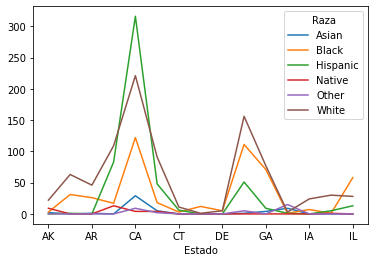

In [34]:
Conteo_incidentes.head(15).plot.line()

Gráfica de líneas de incidentes apiladas por raza.

<AxesSubplot:xlabel='Raza', ylabel='Edad'>

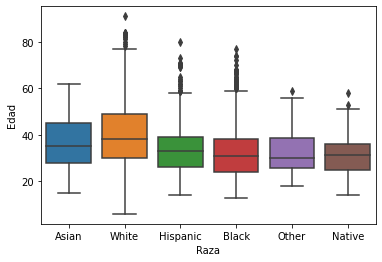

In [35]:
sns.boxplot(x = 'Raza', y = 'Edad', 
            data = df_PS[df_PS.Raza.isin(df_PS.Raza.value_counts().index)])

Gráfica de caja para las edades de cada una de las diferentes razas.

<AxesSubplot:xlabel='Raza', ylabel='Edad'>

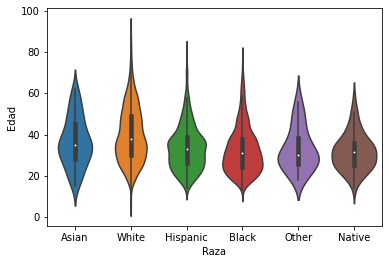

In [36]:
sns.violinplot(x = 'Raza', y = 'Edad', 
            data = df_PS[df_PS.Raza.isin(df_PS.Raza.value_counts().index)])

Gráfica de violín para las edades de cada una de las diferentes razas.

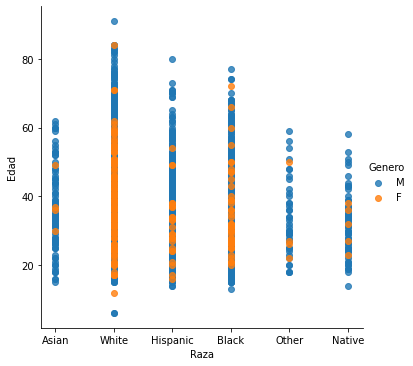

In [37]:
sns.lmplot(x = 'Raza', y = 'Edad', hue = 'Genero', 
           data = df_PS, 
           fit_reg=False)

Gráfica por edad y raza. El eje x tiene una variable categórica por lo que los puntos se muestran en vertical. El color de cada punto esta separado por género.

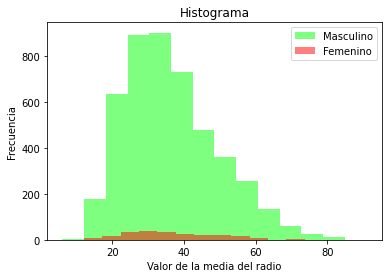

In [38]:
m = plt.hist(df_PS[df_PS["Genero"] == "M"].Edad,bins=14,fc = (0,1,0,0.5),label = "Masculino")
f = plt.hist(df_PS[df_PS["Genero"] == "F"].Edad,bins=14,fc = (1,0,0,0.5),label = "Femenino")
plt.legend()
plt.xlabel("Valor de la media del radio")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

Histograma bi-variable de edades separados por género.

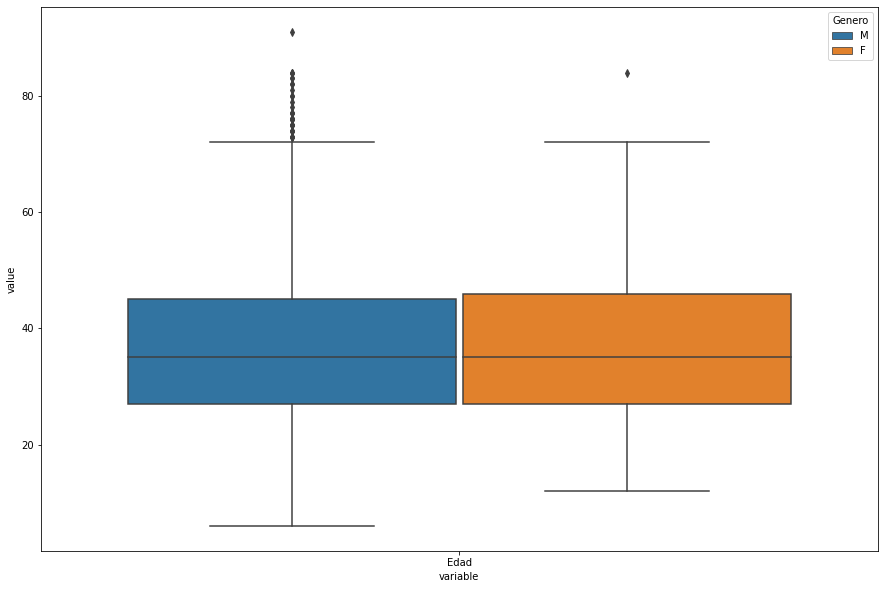

In [39]:
mdata = pd.melt(df_PS,id_vars = "Genero",value_vars = ['Edad'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="Genero",data= mdata)
plt.show()

Gráfica de caja de edad separado por género. 

**Nota:** Solo se tiene una varibale numérica por lo que no se puede hacer multivariable.

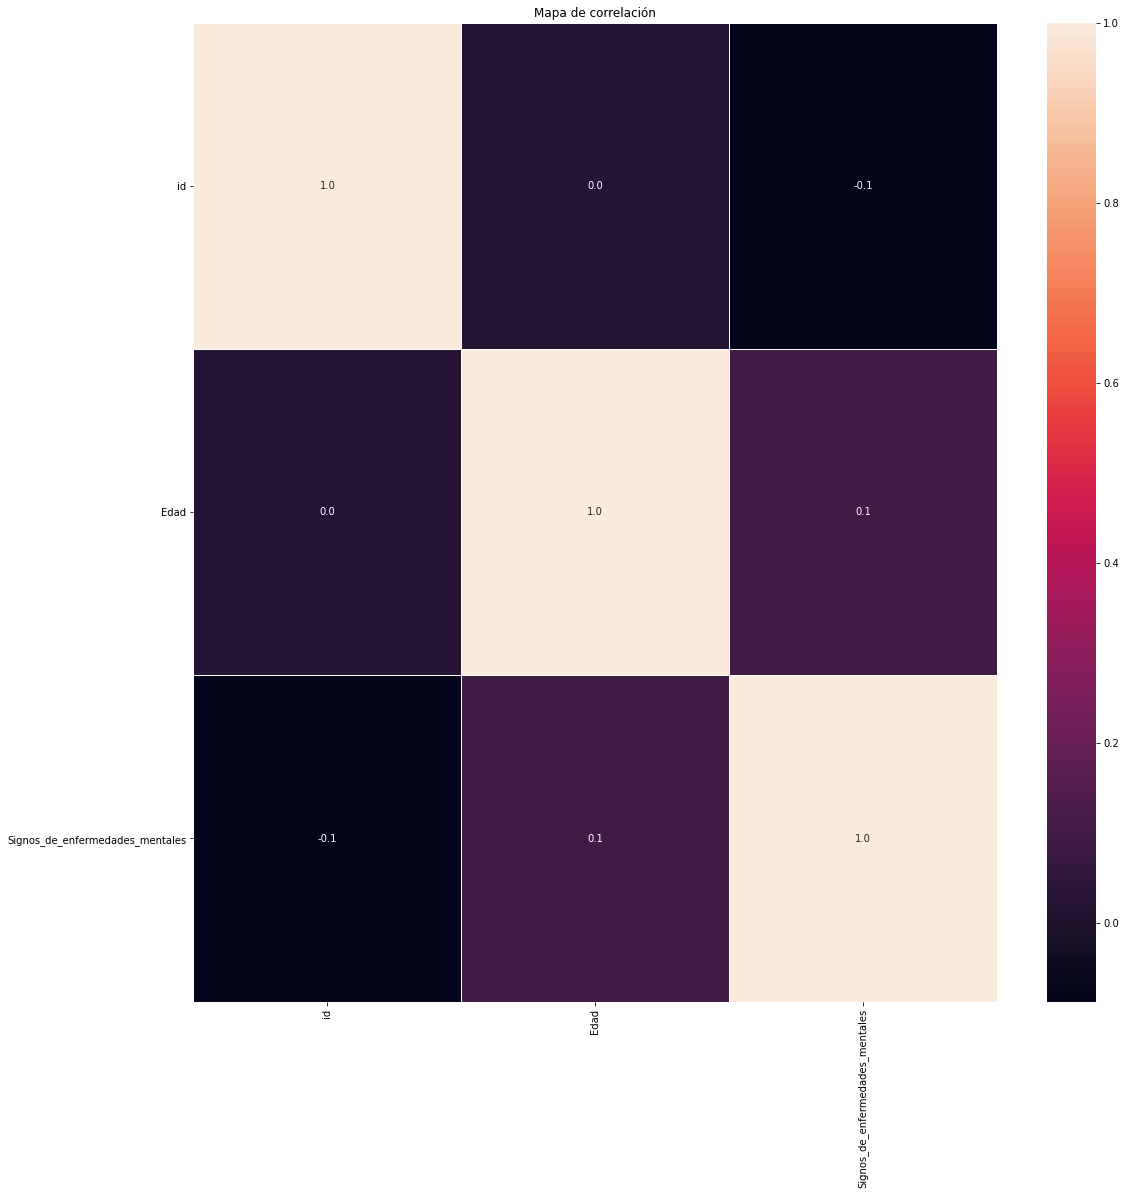

In [40]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df_PS.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.show()

Mapa de correlación.

**Nota:** La mayoría de variables son categóricas, por lo que no funciona la correlación en todas.

# Base de datos.

Base de datos: [Company Bankruptcy Prediction](https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction?select=data.csv)

**Leer y mostrar los datos sin manipular**

In [41]:
 df_Bank = pd.read_csv("bankruptcy.csv")

In [42]:
df_Bank.shape

(6819, 96)

In [43]:
df_Bank.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [44]:
df_Bank.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


**NOTA:** Algo a nuestro favor, es que son puros datos numéricos, por lo que es una ventaja para nosotros en cuanto a manipulación de datos.

In [45]:
df_Bank.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

**Eliminar columnas no deseadas**

* Pre-tax net Interest Rat: Se eliminó, debido a que consideramos redundante, ya que te da la tasa continua ya después de impuestos.
* After-tax net Interest Rate: Se eliminó, debido a que consideramos redundante, ya que te da la tasa continua ya después de impuestos.

**NOTA:** Solo se eliminaron algunas, hasta no ver con más detalle los datos es difícil eliminar tanta información.

In [46]:
df_Bank = df_Bank.drop([' Pre-tax net Interest Rate',' After-tax net Interest Rate'], axis=1)

**Manipulación de los datos tipo null.**

No hay datos tipo null.

In [47]:
df_Bank.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 94, dtype: int64

**Reenombrar Celdas.**

**NOTA:** Solo se cambiaron algunas columnas, ya que seguramente se necesiten eliminar varias columnas.
          Se dejaron aquellas columnas que nos ayuden a analizar los posibles factores que llevaron a la empresa a la
          bancarrota.

In [48]:
df_PS = df_PS.rename(columns={'ROA(B) before interest and depreciation after tax': 'ROA_después_de_impuestos', 
                              'Continuous interest rate (after tax)':'Tasa_continua',
                              'Cash flow rate':'Flujo_de_caja',
                              'After-tax Net Profit Growth Rate': 'Tasa_de_crecimiento_con_impuestos',
                              'Total Asset Growth Rate':'Tasa_de_crecimiento_de_activos totales',
                              'Cash Reinvestment %':'%_de_reinversión', 
                              'Interest Expense Ratio':'Radio_de_gastos_por_intereses',
                              ' Total debt/Total net worth':'Total_de_deuda',
                              'Long-term fund suitability ratio (A)':'Indice_de_fondo_idoneo_a_largo_plazo',
                              'Borrowing dependency':'Dependencia_de_prestamos',
                              'Contingent liabilities/Net worth':'Pasivos_contingentes',
                              ' Accounts Receivable Turnover': 'Rotacion_de_cuentas_por_cobrar' })

**Visualización después de limpieza y exportación de los datos.**

In [49]:
df_Bank.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.302646,0.780985,1.256969e-04,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.303556,0.781506,2.897851e-04,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.302035,0.780284,2.361297e-04,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.303350,0.781241,1.078888e-04,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.303475,0.781550,7.890000e+09,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [50]:
df_PS.shape

(4895, 13)

In [51]:
df_Bank.to_csv('DF_Bank.csv', index = False, header = True)

# Base de datos.

Base de datos: [World University Rankings](https://www.kaggle.com/mylesoneill/world-university-rankings?select=cwurData.csv)

**Leer y mostrar los datos sin manipular.**

In [52]:
df_Uni = pd.read_csv("University.csv")

In [53]:
df_Uni.shape

(2200, 14)

In [54]:
df_Uni.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [55]:
df_Uni.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


**Eliminar columnas no deseadas.**
 * No se planea borrar nada de momento.

In [56]:
#df_Uni = df_Uni.drop([""], axis=1)

**Manipulación de los datos tipo null.**

Los datos de tipo null de la columna broad_impact se rellenaron con la media del resto de los datos.

In [57]:
df_Uni.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [58]:
mediaUniImpacto = df_Uni[df_Uni["broad_impact"].isnull() == False].mean()
mediaUniImpacto["broad_impact"]
df_Uni["broad_impact"] = df_Uni["broad_impact"].fillna(mediaUniImpacto["broad_impact"])
del mediaUniImpacto

**Nota:** Para los datos vacíos, reemplazamos los valores por la media de los valores de la columna de impacto global. Esto para que en caso de ser necesario hacer un comparativo entre las universidades en todas las variables de nuestra elección en cualquier momento.

**Reenombrar Celdas.**

In [59]:
df_Uni = df_Uni.rename(columns = {'world_rank':'Rango',
                                'institution':'Institución',
                                'country':'País',
                                'national_rank': 'Rango_en _su _país',
                                'quality_of_education':'Calidad_de_educación',
                                'alumni_employment':'Ex_alumnos_rango_de_empleo',
                                'quality_of_faculty':'Rango_calidad_facultad',
                                'publications':'Rango _de_publicaciones',
                                'influence':'Rango_de_influencia',
                                'citations':'Citas',
                                'broad_impact':'Impacto',
                                'patents':'Patentes' , 
                                'score':'Puntuación', 
                                'year':'Año'})

**Estadística básica.**

In [60]:
df_Uni['Puntuación'].value_counts()

44.44    24
44.38    19
44.31    18
44.39    18
44.32    18
         ..
53.77     1
64.05     1
48.84     1
89.42     1
54.00     1
Name: Puntuación, Length: 764, dtype: int64

**Observación:** Se contabilizó el numero de instituciones que se tienen por puntuación.

In [61]:
df_Uni['País'].value_counts().sum()

2200

**Observación:** Se sumó el número total de instituciones por país.

In [62]:
df_Uni['Institución'].value_counts()

University of Minnesota, Twin Cities                 4
Rutgers University-New Brunswick                     4
Swiss Federal Institute of Technology in Lausanne    4
Weizmann Institute of Science                        4
University of Wisconsin–Madison                      4
                                                    ..
National Dong Hwa University                         1
Beijing Jiaotong University                          1
Tamkang University                                   1
Western Michigan University                          1
École centrale de Lyon                               1
Name: Institución, Length: 1024, dtype: int64

**Observación:** Se contabilizaron el número de instituciones que existen.

In [63]:
df_Uni['Puntuación'].describe()

count    2200.000000
mean       47.798395
std         7.760806
min        43.360000
25%        44.460000
50%        45.100000
75%        47.545000
max       100.000000
Name: Puntuación, dtype: float64

**Observación:** Se analizó la puntuación para ver cómo estaban las instituciones.

In [64]:
df_Uni['Calidad_de_educación'].mean()

275.10045454545457

**Observación:** Para medió el promedio que tienen las instituciones en cuánto a calidad de educación.

In [65]:
df_Uni['Calidad_de_educación'].median()

355.0

**Observación:** De entre los datos, se quiso observar cual era la mediana de la calidad de educación, para darnos una idea de la distribución de los datos.

In [66]:
df_Uni['Calidad_de_educación'].std()

121.9351000405308

**Observación:** De entre la calidad de educación, quisimos conocer el valor máximo que se tiene entre las instituciones.

In [67]:
df_Uni['Calidad_de_educación'].max()

367

**Observación:** Se quiso estudiar un poco más la distribución de los datos, obteniendo que se tiene una asimetría negativa.

In [68]:
df_Uni['Calidad_de_educación'].skew()

-1.000066639458965

**Observación:** Para analizar si había una relación entre los datos, se examinó la correlación entre estos.

In [69]:
df_Uni.corr()

,Rango,Rango_en _su _país,Calidad_de_educación,Ex_alumnos_rango_de_empleo,Rango_calidad_facultad,Rango _de_publicaciones,Rango_de_influencia,Citas,Impacto,Patentes,Puntuación,Año
Rango,1.000000,0.238553,0.676166,0.668529,0.663864,0.923037,0.895871,0.856573,0.853083,0.698214,-0.549098,0.320844
Rango_en _su _país,0.238553,1.000000,0.211975,0.135342,0.222833,0.326857,0.161086,0.186797,0.170417,0.159440,-0.199756,0.102951
Calidad_de_educación,0.676166,0.211975,1.000000,0.606421,0.786181,0.624657,0.645641,0.630455,0.435879,0.528120,-0.600541,0.427732
Ex_alumnos_rango_de_empleo,0.668529,0.135342,0.606421,1.000000,0.558618,0.572096,0.527382,0.559200,0.371666,0.528219,-0.510374,0.427710
Rango_calidad_facultad,0.663864,0.222833,0.786181,0.558618,1.000000,0.634423,0.656406,0.652186,0.428516,0.555107,-0.693540,0.484788
Rango _de_publicaciones,0.923037,0.326857,0.624657,0.572096,0.634423,1.000000,0.874952,0.829912,0.831680,0.671558,-0.522111,0.318245
Rango_de_influencia,0.895871,0.161086,0.645641,0.527382,0.656406,0.874952,1.000000,0.845207,0.830123,0.611811,-0.522837,0.318298
Citas,0.856573,0.186797,0.630455,0.559200,0.652186,0.829912,0.845207,1.000000,0.769196,0.598728,-0.522438,0.328771
Impacto,0.853083,0.170417,0.435879,0.371666,0.428516,0.831680,0.830123,0.769196,1.000000,0.508507,-0.430408,-0.000077
Patentes,0.698214,0.159440,0.528120,0.528219,0.555107,0.671558,0.611811,0.598728,0.508507,1.000000,-0.474810,0.368570


**Observación:** Asimismo, se vio el grado de variación de los datos mediante la covarianza.

In [70]:
df_Uni.cov()

,Rango,Rango_en _su _país,Calidad_de_educación,Ex_alumnos_rango_de_empleo,Rango_calidad_facultad,Rango _de_publicaciones,Rango_de_influencia,Citas,Impacto,Patentes,Puntuación,Año
Rango,92610.883046,3756.208897,25090.710964,37999.668548,12940.021084,85325.970338,82697.881289,68913.128033,71019.327649,58218.971227,-1296.844868,74.413990
Rango_en _su _país,3756.208897,2677.117668,1337.353580,1307.965670,738.478596,5137.155941,2528.196358,2555.112610,2412.134751,2260.347442,-80.212209,4.059697
Calidad_de_educación,25090.710964,1337.353580,14868.168622,13811.196536,6140.110828,23136.694494,23880.176763,20323.080392,14539.496545,17644.381289,-568.300430,39.749287
Ex_alumnos_rango_de_empleo,37999.668548,1307.965670,13811.196536,34886.488848,6682.961227,32458.514088,29879.417455,27612.293206,18990.477655,27032.610725,-739.815933,60.884596
Rango_calidad_facultad,12940.021084,738.478596,6140.110828,6682.961227,4102.515913,12343.406787,12753.093334,11043.414574,7508.380003,9741.978720,-344.749347,23.664972
Rango _de_publicaciones,85325.970338,5137.155941,23136.694494,32458.514088,12343.406787,92270.351358,80618.202976,66645.291893,69110.146164,55893.294051,-1230.838437,73.675286
Rango_de_influencia,82697.881289,2528.196358,23880.176763,29879.417455,12753.093334,80618.202976,92010.194174,67777.798857,68883.440027,50848.789510,-1230.811052,73.583716
Citas,68913.128033,2555.112610,20323.080392,27612.293206,11043.414574,66645.291893,67777.798857,69889.672098,55628.582193,43369.161000,-1071.885442,66.241432
Impacto,71019.327649,2412.134751,14539.496545,18990.477655,7508.380003,69110.146164,68883.440027,55628.582193,74835.638199,38115.044075,-913.778515,-0.016144
Patentes,58218.971227,2260.347442,17644.381289,27032.610725,9741.978720,55893.294051,50848.789510,43369.161000,38115.044075,75074.095530,-1009.651954,76.965232


**Observación:**

**Visualización después de limpieza y exportación de los datos.**

In [71]:
df_Uni.head()

,Rango,Institución,País,Rango_en _su _país,Calidad_de_educación,Ex_alumnos_rango_de_empleo,Rango_calidad_facultad,Rango _de_publicaciones,Rango_de_influencia,Citas,Impacto,Patentes,Puntuación,Año
0,1,Harvard University,USA,1,7,9,1,1,1,1,496.6995,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,496.6995,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,496.6995,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,496.6995,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,496.6995,18,85.21,2012


In [72]:
df_Uni.shape

(2200, 14)

In [73]:
df_Uni.to_csv('DF_Uni.csv', index = False, header = True)

**Conteo de los primeros 15 países.**

<AxesSubplot:title={'center':'Gráfico de barras por países'}>

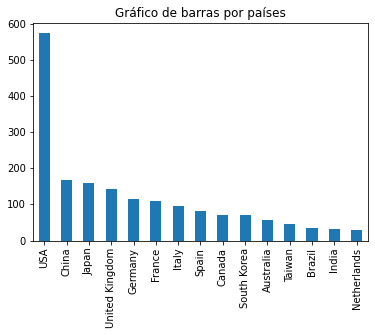

In [74]:
df_Uni['País'].value_counts().head(15).plot.bar(title="Gráfico de barras por países")

Gráfico de barras del conteo de universidades por países.

**Calidad de educación con mayor presencia en instituciones.**

<AxesSubplot:title={'center':'Gráfico de barra por calidad de educación'}>

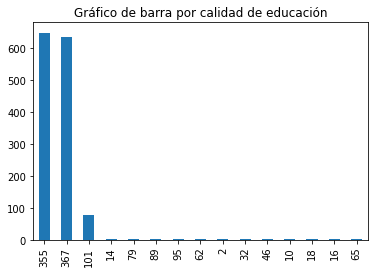

In [93]:
df_Uni['Calidad_de_educación'].value_counts().sort_values(ascending = False).head(15).plot.bar(title="Gráfico de barra por calidad de educación")

**Análisis de los países.**

In [76]:
#df_Uni['País'].value_counts().sort_index().plot(title="Gráfico de línea por países")

In [77]:
#sns.kdeplot(df_Uni['País'].value_counts().sort_index())

In [78]:
#df_Uni['País'].value_counts().sort_index().plot.area()

**Análisis de calidad de educación.**

<AxesSubplot:ylabel='Frequency'>

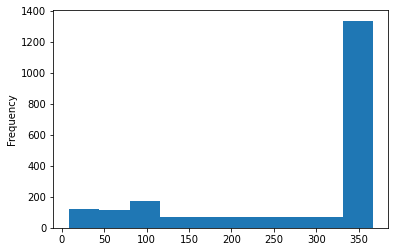

In [79]:
df_Uni[df_Uni['Calidad_de_educación'] > 7]['Calidad_de_educación'].plot.hist()

C:\Users\almac\anaconda3\envs\R y Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Calidad_de_educación'>

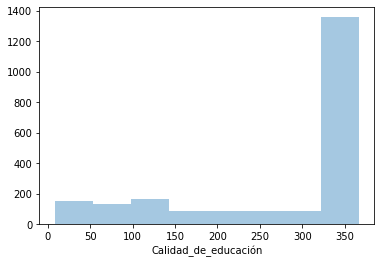

In [189]:
sns.distplot(df_Uni[df_Uni['Calidad_de_educación'] > 7]['Calidad_de_educación'], bins = 8, kde = False)

C:\Users\almac\anaconda3\envs\R y Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calidad_de_educación', ylabel='count'>

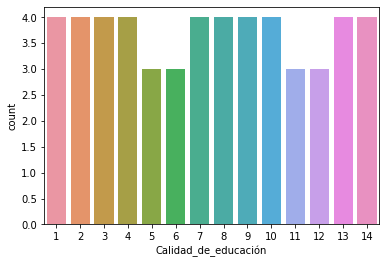

In [92]:
sns.countplot(df_Uni[df_Uni['Calidad_de_educación']<15]['Calidad_de_educación'])

**Análisis de Puntuación.**

<AxesSubplot:xlabel='Año', ylabel='Puntuación'>

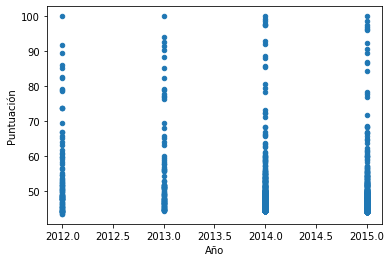

In [82]:
df_Uni.plot.scatter(x='Año', y='Puntuación')

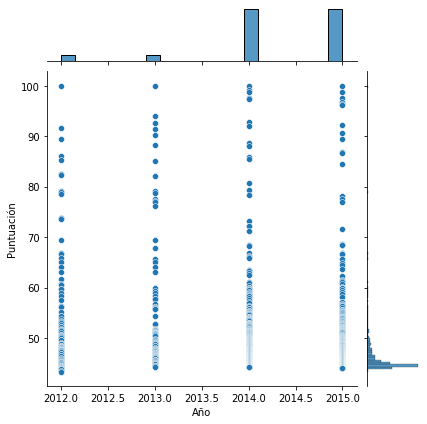

In [83]:
sns.jointplot(x='Año', y='Puntuación', data = df_Uni)

**Análisis de Universidades por calidad de educación y puntuación.**

In [208]:
Conteo_universidades = df_Uni['Institución'].groupby([df_Uni['Calidad_de_educación'], df_Uni['Puntuación']<80]).count().unstack().fillna(0)

<AxesSubplot:xlabel='Calidad_de_educación'>

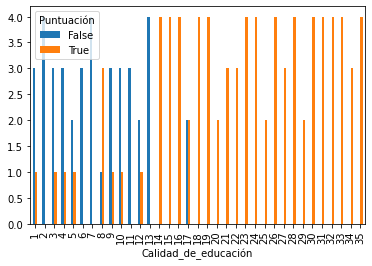

In [209]:
Conteo_universidades.head(35).plot.bar(stacked = False)

**Análisis de universidades por puntuación y año**

In [210]:
Conteo_anual = df_Uni['Institución'].groupby([df_Uni['Puntuación'], df_Uni['Año']]).count().unstack().fillna(0)

<AxesSubplot:xlabel='Puntuación'>

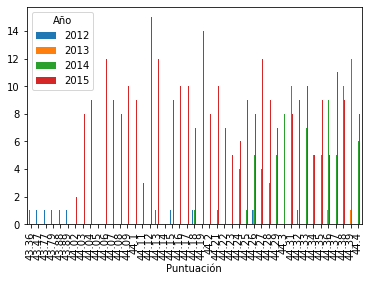

In [211]:
Conteo_anual.head(45).plot.bar(stacked = False)

<AxesSubplot:xlabel='Puntuación'>

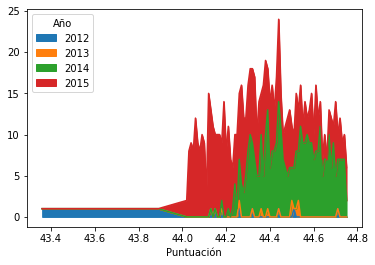

In [212]:
Conteo_anual.head(80).plot.area()

<AxesSubplot:xlabel='Puntuación'>

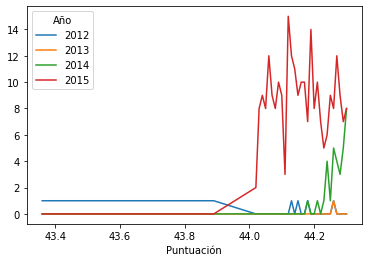

In [213]:
Conteo_anual.head(35).plot.line()

<AxesSubplot:xlabel='Patentes', ylabel='Puntuación'>

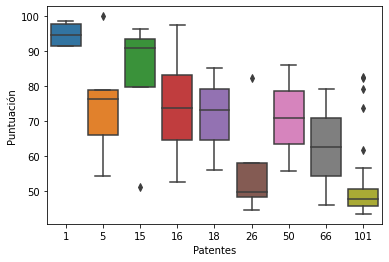

In [137]:
sns.boxplot(x = 'Patentes', y = 'Puntuación', 
            data = df_Uni[df_Uni.Patentes.isin(df_Uni.Patentes.head(10).value_counts().index)])

<AxesSubplot:xlabel='Patentes', ylabel='Puntuación'>

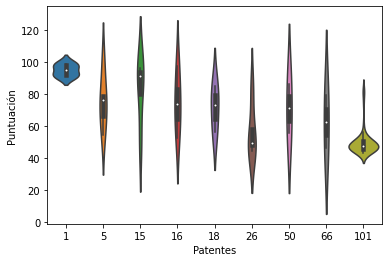

In [186]:
sns.violinplot(x = 'Patentes', y = 'Puntuación', 
            data = df_Uni[df_Uni.Patentes.isin(df_Uni.Patentes.head(10).value_counts().index)])